#### Problem 1

In [12]:
using PyCall, PyPlot

#### Problem 1(a)

In [13]:
struct IVPproblem
    f::Function
    T::Int64
    y0::Vector
end
struct IVPsolution
    t::Vector
    y::Matrix
end

#### Problem 1(b)

In [14]:
function runge5(f,y0,h,N,t0 = 0)
    t = t0 .+ h .*(0:N)
    y = zeros(N+1, length(y0))

    y[1,:] .= y0
    
    for n = 1:N
        k1 = h * f(t[n], y[n,:])
        #println("k1 is ", k1)
        k2 = h * f(t[n] + h/5, y[n,:] + k1/5)
        #println("k2 is ", k2)
        k3 = h * f(t[n] + 2*h/5, y[n,:] + 2*k2/5)
        #println("k3 is ", k3)
        k4 = h * f(t[n] + h, y[n,:] + 9*k1/4 - 5*k2 + 15*k3/4)
        #println("k4 is ", k4)
        k5 = h * f(t[n] + 3*h/5, y[n,:] - 63*k1/100 + 9*k2/5 - 13*k3/20 + 2*k4/25)
        #println("k5 is ", k5)
        k6 = h * f(t[n] + 4*h/5, y[n,:] - 6*k1/25 + 4*k2/5 + 2*k3/15 + 8*k4/75)
        #println("k6 is ", k6)
        y[n+1,:] = y[n,:] + (17*k1 + 100*k3 + 2*k4 - 50*k5 + 75*k6) / 144
        #println("Now we have ", (17*k1 + 100*k3 + 2*k4 - 50*k5 + 75*k6) / 144," being added to ",y[n,:])
    end
    return t,y

end

runge5 (generic function with 3 methods)

#### Problem 1(c)

In [15]:
function runge5(ivp::IVPproblem, N::Integer)
    t,y = runge5(ivp.f,ivp.y0,((ivp.T)/N),N,0)
    return IVPsolution(t,y)
end

runge5 (generic function with 3 methods)

#### Problem 1(d)

the difference between the exact solution and the real solution is: [0.0; 1.369292901287622e-9; 2.477974936354599e-9; 3.363246681153953e-9; 4.057588598449513e-9; 4.589322477599467e-9; 4.9831089254936956e-9; 5.260387236916131e-9; 5.439765915493666e-9; 5.537366731811488e-9; 5.5671295906556395e-9;;]


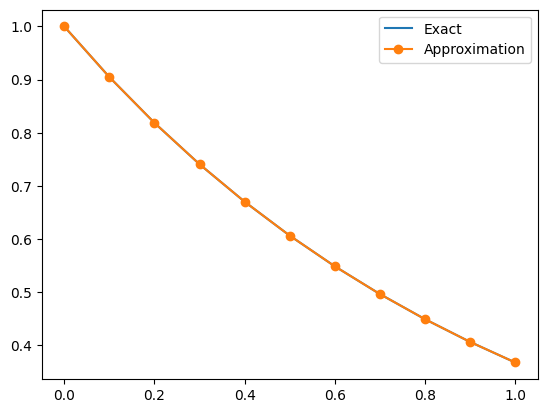

In [16]:
f(t,y) = -y
T = 1
N = 10
tt = 0:0.1:1
yexact(t) = exp(-t)
p = IVPproblem(f,T,[1])
sol = runge5(p,N)
plot(tt,yexact.(tt))
plot(sol.t,sol.y,"-o")
legend(("Exact","Approximation"))
println("the difference between the exact solution and the real solution is: ",yexact.(tt) .- sol.y)

#### Problem 2(a)


In [17]:
function fpend(t,y)
    a = y[3]
    b = y[4]
    c = (-3*sin(y[1]) - sin(y[1] - 2*y[2]) - 2*sin(y[1] - y[2]) * (y[4]^2 + y[3]^2*cos(y[1] - y[2]))) / (3 - cos(2*y[1] - 2*y[2]))
    d = (2*sin(y[1] - y[2]) * (2*y[3]^2 + 2*cos(y[1]) + y[4]^2*cos(y[1] - y[2]))) / (3 - cos(2*y[1] - 2*y[2]))
    return [a,b,c,d]
end


fpend (generic function with 1 method)

#### Problem 2(b)

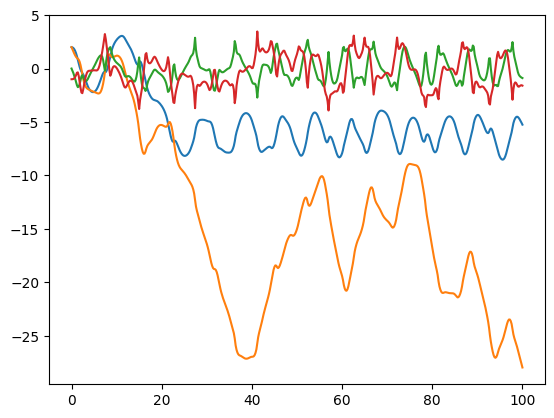

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6ad13048e0>

In [18]:
y0 = [2,2,0,-1]
T = 100
N = 500

q = IVPproblem(fpend,T,y0)
sol = runge5(q,N)

plot(sol.t,sol.y[:,1])
plot(sol.t,sol.y[:,2])
plot(sol.t,sol.y[:,3])
plot(sol.t,sol.y[:,4])




In [19]:
#d = pyimport("IPython.display")
@pyimport IPython.display as d
function anim(sol::IVPsolution)
    animation = pyimport("matplotlib.animation");
    fig, ax = subplots(figsize=(5,5))
    function update(frame)
        θ1 = sol.y[frame+1,1]
        θ2 = sol.y[frame+1,2]
        p1 = [sin(θ1),-cos(θ1)]
        p2 = p1 .+ [sin(θ2),-cos(θ2)]
        ax.clear()
        ax.plot([0,p1[1],p2[1]], [0,p1[2],p2[2]], linewidth=2)
        ax.add_artist(matplotlib.patches.Circle(p1, 0.1))
        ax.add_artist(matplotlib.patches.Circle(p2, 0.1))
        ax.set_xlim([-2.5,2.5])
        ax.set_ylim([-2.5,2.5])
    end

    ani = animation.FuncAnimation(fig, update, frames=length(sol.t), interval=50)
    close(ani._fig)
    d.HTML(ani.to_jshtml())
end

anim(sol)

PyObject <IPython.core.display.HTML object>